
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Practice Session - 04  </font></center></h1>
<h2><center> <font color='black'> Network Centrality Measures</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


================================================================================================================

# Already Covered:
1. **Get familiar with the graphs and how to work with them using igraph library; [Lab - 02]**
2. **Analyse the data about media companies. Figure out their connections; [Lab - 02]**
3. **Learn about various way of displaying statistic on the graphs; [Lab - 02]**
4. **Network models using Networkx library; [Lab - 03]**
+ **Specific graphs and graph models**
  1. Empty graph
  2. Complete graph/ Full graph
  3. Simple star graph
  4. Random tree
  5. Balanced tree
  6. Erdos-Renyi random graph model
  7. Watts–Strogatz small-world graph
  8. Barabási–Albert preferential attachment model
  9. Scale-free graph Vs Small-world graph
+ **Network and node descriptives**
  1. Density
  2. Reciprocity
  3. Transitivity
  4. Clustering coefficient
  5. Diameter
  6. Node degrees
  7. Degree distribution
  8. Paths
  9. Average path length
  10. Connected components
  11. Giant component
  12. k-cores

# Today's session agenda:
+ **Network Centrality Measures using networkx**
  1. Degree
  2. Closeness centrality
  3. Betweeness
  4. Eigenvector
  5. Katz
  6. Pagerank
  7. Hubs and Authorities
  8. Prestige

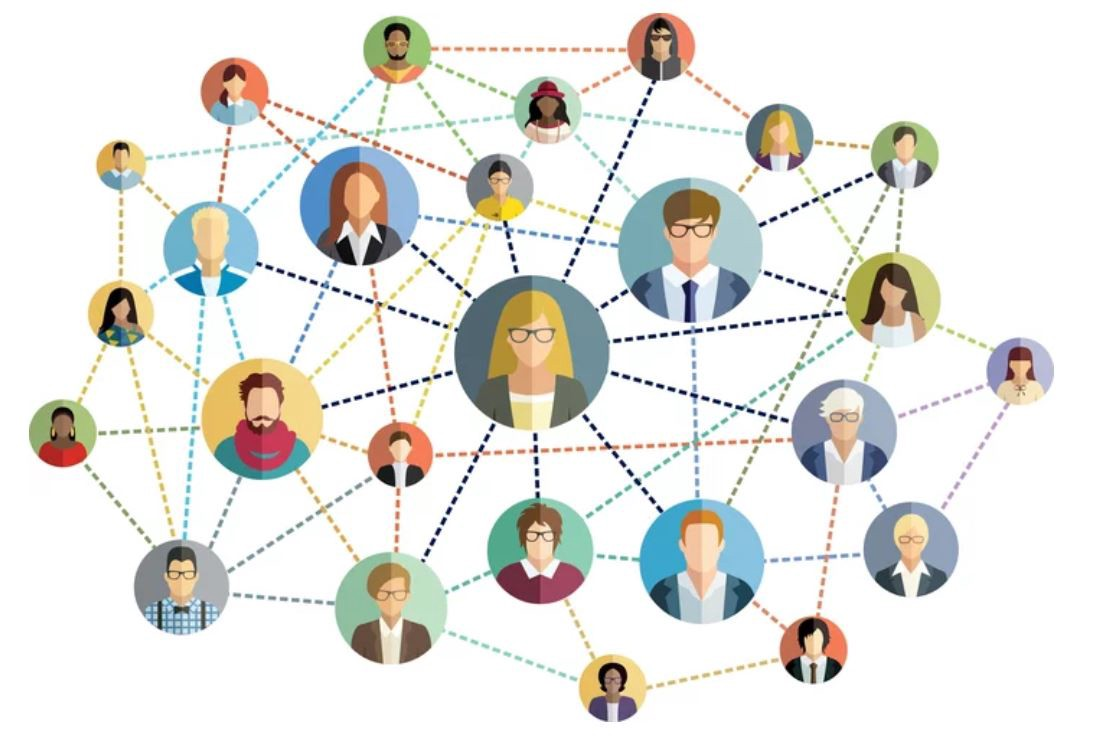

In [ ]:
from IPython.display import Image
#Image("SN.jpg") #https://medium.com/

# Libraries needed:

**We need following libraries: networkx**


In [ ]:
# Import libraries
#!pip install networkx==2.8 please install this version
# !pip install scipy==1.8.0 please install this version
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

# Loading Datasets:

In [ ]:
#Read nodes and edges datasets
nodes = pd.read_csv('InputFileNodes.csv')
edges = pd.read_csv('InputFileEdges.csv')

In [ ]:
nodes.head()

,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


In [ ]:
edges.head()

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [ ]:
edges.shape

(51, 4)

In [ ]:
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to', 'type'])['weight'].sum().reset_index()

In [ ]:
edges.shape

(48, 4)

In [ ]:
edges.head()

,from,to,type,weight
0,s01,s02,hyperlink,22
1,s01,s03,hyperlink,22
2,s01,s04,hyperlink,21
3,s01,s15,mention,20
4,s02,s01,hyperlink,23


In [ ]:
#Create undirected graph using edgelist
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True)

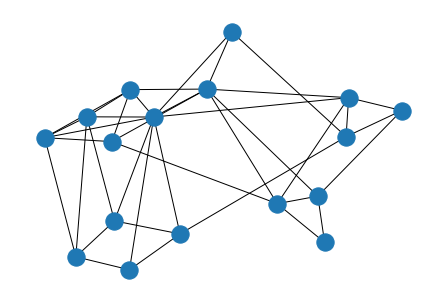

In [ ]:
nx.draw(G)

In [ ]:
#Create directed graph using edgelist
G_directed = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.DiGraph())

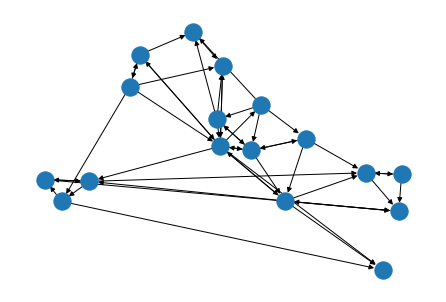

In [ ]:
nx.draw(G_directed)

In [ ]:
#network info
nx.info(G)

'Graph with 17 nodes and 38 edges'

In [ ]:
nx.info(G_directed)

'DiGraph with 17 nodes and 48 edges'

In [ ]:
#Check nodes
G.nodes()

NodeView(('s01', 's02', 's03', 's04', 's15', 's09', 's10', 's05', 's08', 's11', 's12', 's06', 's17', 's16', 's07', 's14', 's13'))

In [ ]:
#Check edges
G.edges()

EdgeView([('s01', 's02'), ('s01', 's03'), ('s01', 's04'), ('s01', 's15'), ('s01', 's05'), ('s02', 's03'), ('s02', 's09'), ('s02', 's10'), ('s02', 's05'), ('s03', 's04'), ('s03', 's05'), ('s03', 's08'), ('s03', 's10'), ('s03', 's11'), ('s03', 's12'), ('s03', 's07'), ('s04', 's06'), ('s04', 's11'), ('s04', 's12'), ('s04', 's17'), ('s04', 's15'), ('s15', 's05'), ('s15', 's06'), ('s09', 's05'), ('s09', 's08'), ('s09', 's10'), ('s10', 's07'), ('s08', 's07'), ('s11', 's14'), ('s12', 's06'), ('s12', 's13'), ('s12', 's14'), ('s06', 's16'), ('s06', 's17'), ('s17', 's13'), ('s17', 's16'), ('s07', 's14'), ('s14', 's13')])

In [ ]:
G.edges.data()

EdgeDataView([('s01', 's02', {'type': 'hyperlink', 'weight': 23}), ('s01', 's03', {'type': 'hyperlink', 'weight': 21}), ('s01', 's04', {'type': 'hyperlink', 'weight': 21}), ('s01', 's15', {'type': 'hyperlink', 'weight': 22}), ('s01', 's05', {'type': 'mention', 'weight': 1}), ('s02', 's03', {'type': 'hyperlink', 'weight': 21}), ('s02', 's09', {'type': 'hyperlink', 'weight': 1}), ('s02', 's10', {'type': 'hyperlink', 'weight': 5}), ('s02', 's05', {'type': 'hyperlink', 'weight': 21}), ('s03', 's04', {'type': 'hyperlink', 'weight': 23}), ('s03', 's05', {'type': 'hyperlink', 'weight': 1}), ('s03', 's08', {'type': 'hyperlink', 'weight': 2}), ('s03', 's10', {'type': 'hyperlink', 'weight': 2}), ('s03', 's11', {'type': 'hyperlink', 'weight': 1}), ('s03', 's12', {'type': 'hyperlink', 'weight': 1}), ('s03', 's07', {'type': 'mention', 'weight': 1}), ('s04', 's06', {'type': 'mention', 'weight': 1}), ('s04', 's11', {'type': 'mention', 'weight': 22}), ('s04', 's12', {'type': 'hyperlink', 'weight': 3})

## Visualization
1. nx.draw
2. nx.draw_networkx

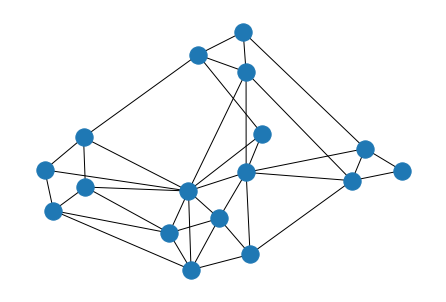

In [ ]:
nx.draw(G)

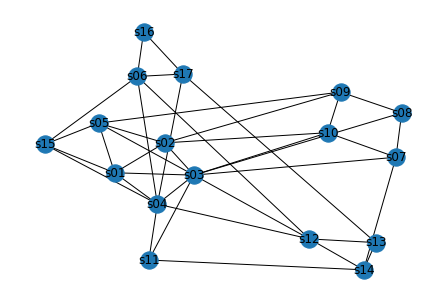

In [ ]:
#To add vertex labels
nx.draw(G, with_labels=True)

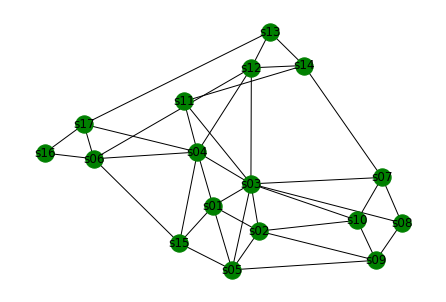

In [ ]:
#To add vertex labels and change color
nx.draw(G, with_labels=True, node_color='g')

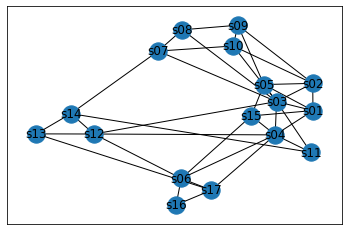

In [ ]:
nx.draw_networkx(G)

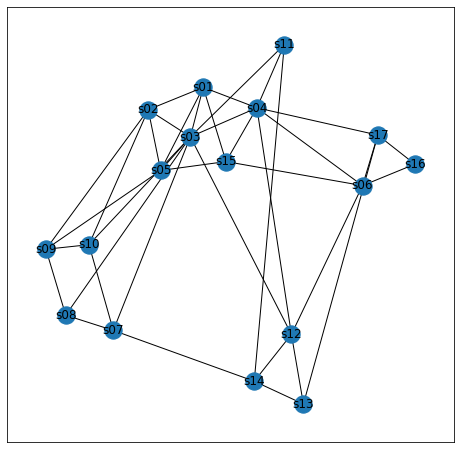

In [ ]:
plt.figure(figsize=(8,8))
nx.draw_networkx(G)
plt.show()

In [ ]:
plt.savefig('UndirectedGraph.png')

<Figure size 432x288 with 0 Axes>

# 1. Network Centrality Measures

## 1.1. Degree centrality

The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.

In [ ]:
G.nodes

NodeView(('s01', 's02', 's03', 's04', 's15', 's09', 's10', 's05', 's08', 's11', 's12', 's06', 's17', 's16', 's07', 's14', 's13'))

In [ ]:
G.degree('s02')

5

(array([1., 3., 6., 0., 5., 0., 0., 1., 0., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <a list of 10 Patch objects>)

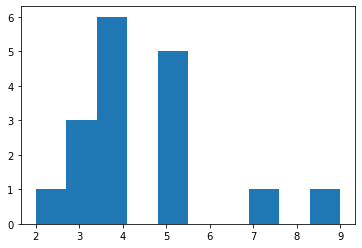

In [ ]:
#Degree plot for undirected and unweighted graph
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)

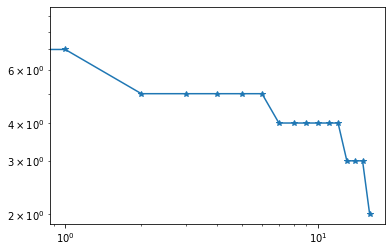

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

(array([ 1.,  0.,  1., 10.,  1.,  0.,  0.,  3.,  0.,  1.]),
 array([24. , 30.4, 36.8, 43.2, 49.6, 56. , 62.4, 68.8, 75.2, 81.6, 88. ]),
 <a list of 10 Patch objects>)

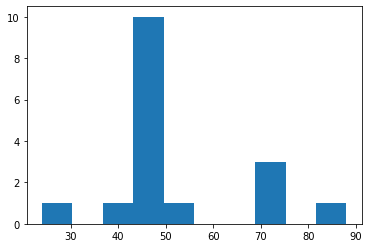

In [ ]:
#Degree plot for undirected and weighted graph
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

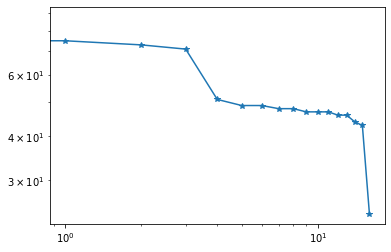

In [ ]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [ ]:
#Degree centrality for unweighted graph
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'s01': 0.3125,
 's02': 0.3125,
 's03': 0.5625,
 's04': 0.4375,
 's05': 0.3125,
 's06': 0.3125,
 's07': 0.25,
 's08': 0.1875,
 's09': 0.25,
 's10': 0.25,
 's11': 0.1875,
 's12': 0.3125,
 's13': 0.1875,
 's14': 0.25,
 's15': 0.25,
 's16': 0.125,
 's17': 0.25}

In [ ]:
G.degree('s03')/(17-1)

0.5625

In [ ]:
#Sort for identifying most inflential nodes using degree centrality
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

s03 0.5625
s04 0.4375
s01 0.3125
s02 0.3125
s05 0.3125
s12 0.3125
s06 0.3125
s15 0.25
s09 0.25
s10 0.25
s17 0.25
s07 0.25
s14 0.25
s08 0.1875
s11 0.1875
s13 0.1875
s16 0.125


In [ ]:
#Calculating degree centrality from scratch
n_nodes = len(G.nodes)
for node in G.nodes():
  print(node, G.degree(node)/(n_nodes-1))

s01 0.3125
s02 0.3125
s03 0.5625
s04 0.4375
s15 0.25
s09 0.25
s10 0.25
s05 0.3125
s08 0.1875
s11 0.1875
s12 0.3125
s06 0.3125
s17 0.25
s16 0.125
s07 0.25
s14 0.25
s13 0.1875


In [ ]:
#Degree centrality for weighted graph
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())
degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]
degree_centrality_weighted

[1.0,
 0.8068181818181818,
 0.8295454545454546,
 0.8522727272727273,
 0.5454545454545454,
 0.5340909090909091,
 0.5568181818181818,
 0.5227272727272727,
 0.5227272727272727,
 0.2727272727272727,
 0.5568181818181818,
 0.5795454545454546,
 0.5340909090909091,
 0.5,
 0.5340909090909091,
 0.5454545454545454,
 0.48863636363636365]

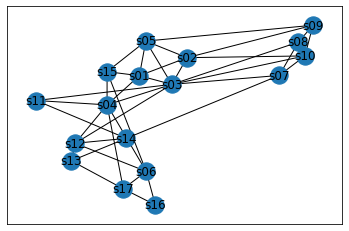

In [ ]:
#visualization
nx.draw_networkx(G)

## 1.2. Closeness centrality

In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [ ]:
#Undirected and unweigted graph
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
#Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

s03 0.6666666666666666
s04 0.6153846153846154
s12 0.5714285714285714
s01 0.5333333333333333
s05 0.5161290322580645
s11 0.5161290322580645
s06 0.5
s02 0.48484848484848486
s15 0.48484848484848486
s07 0.48484848484848486
s10 0.47058823529411764
s14 0.47058823529411764
s08 0.45714285714285713
s17 0.45714285714285713
s13 0.43243243243243246
s09 0.41025641025641024
s16 0.35555555555555557


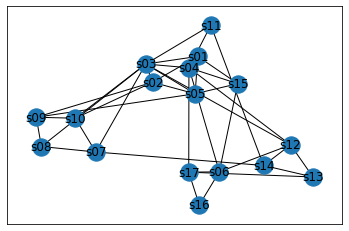

In [ ]:
nx.draw_networkx(G)

In [ ]:
#Undirected and weighted
G_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, G_distance_dict, 'distance')

In [ ]:
nx.closeness_centrality(G, distance='distance')

{'s01': 4.328386707502425,
 's02': 4.1338964629333805,
 's03': 4.219460803657184,
 's04': 4.268401985373312,
 's05': 3.743172105864558,
 's06': 2.584800069326936,
 's07': 3.1851324515718087,
 's08': 2.8587570621468927,
 's09': 3.0231516056758774,
 's10': 3.411509751986516,
 's11': 3.611498779640711,
 's12': 2.7373369827725003,
 's13': 2.526803893884224,
 's14': 2.6153088850603003,
 's15': 3.938810544825238,
 's16': 2.399414033557587,
 's17': 2.5387155009832862}

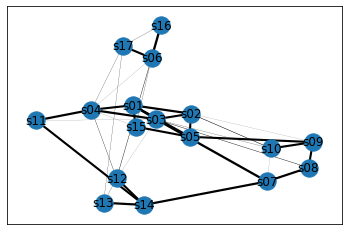

In [ ]:
nx.draw_networkx(G, width=edges['weight']/10)

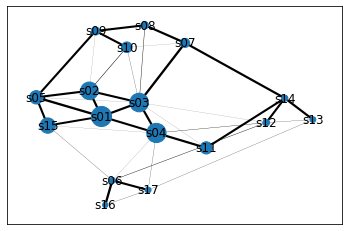

In [ ]:
#Plotted with edge width and node size
size = [4**val for val in nx.closeness_centrality(G, distance='distance').values()]
nx.draw_networkx(G, width=edges['weight']/10G_unweighted_undirected)

## 1.3. Betweenness centrality

* Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

* Best connector/ Bridge

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
#Sort for identifying most inflential nodes using betweenness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

s03 0.3404166666666666
s04 0.19566468253968256
s12 0.12271825396825395
s06 0.10018849206349206
s05 0.0654563492063492
s15 0.05621031746031746
s17 0.05293650793650794
s07 0.050277777777777775
s14 0.04916666666666667
s01 0.039146825396825395
s02 0.025992063492063486
s10 0.025843253968253963
s13 0.02111111111111111
s08 0.019593253968253965
s11 0.017916666666666664
s09 0.01736111111111111
s16 0.0


In [ ]:
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')

In [ ]:
#Sort for identifying most inflential nodes using betweenness centrality
for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])

s03 0.7583333333333333
s12 0.5
s05 0.3333333333333333
s04 0.325
s06 0.2916666666666667
s11 0.125
s17 0.125
s09 0.11666666666666667
s01 0.0
s02 0.0
s15 0.0
s10 0.0
s08 0.0
s16 0.0
s07 0.0
s14 0.0
s13 0.0


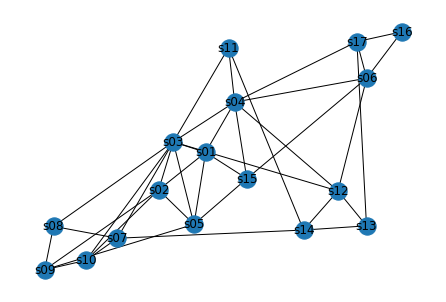

In [ ]:
nx.draw(G, with_labels=True)

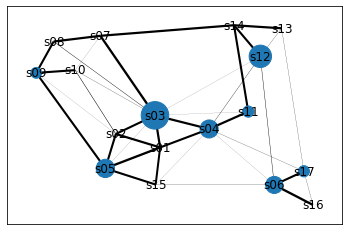

In [ ]:
#Plotted with edge with and node size
size = [val*1000 for val in nx.betweenness_centrality(G, weight='weight').values()]
nx.draw_networkx(G, width=edges['weight']/10, node_size=size)

In [ ]:
nx.betweenness_centrality(G, weight='weight', normalized=False)

{'s01': 0.0,
 's02': 0.0,
 's03': 91.0,
 's04': 39.0,
 's05': 40.0,
 's06': 35.0,
 's07': 0.0,
 's08': 0.0,
 's09': 14.0,
 's10': 0.0,
 's11': 15.0,
 's12': 60.0,
 's13': 0.0,
 's14': 0.0,
 's15': 0.0,
 's16': 0.0,
 's17': 15.0}

## 1.4. Eigenvector centrality

If a node is pointed to by many nodes (which also have high eigenvector centrality) then that node will have high eigenvector centrality.

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [ ]:
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality[node])

s03 0.4485472979675354
s04 0.35283346117368636
s01 0.3191408683729161
s05 0.2925525270528745
s02 0.2910340882293079
s12 0.24880953882933404
s15 0.23130251528184964
s10 0.222095451699962
s06 0.20688820586442147
s07 0.19361886199342873
s09 0.19159229230644562
s11 0.18692750129523714
s08 0.16462950341222413
s14 0.14530038460965827
s17 0.14528213666865797
s13 0.10650654463624042
s16 0.06953859174549203


In [ ]:
# Graph with undirected and weighted
eigenvector_centrality_weighted = nx.eigenvector_centrality(G, weight='weight')

In [ ]:
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality_weighted, key=eigenvector_centrality_weighted.get, reverse=True):
  print(node, eigenvector_centrality_weighted[node])

s01 0.5243879751840347
s03 0.4609728287014519
s02 0.42342666430028353
s04 0.3941573797305684
s15 0.26726633574782704
s05 0.2420657903542251
s11 0.142060019159748
s10 0.0843957773249976
s09 0.06061597013618107
s06 0.055568140658198546
s17 0.05524318269416053
s07 0.05384481797483083
s08 0.05344744462526896
s12 0.045352284943063315
s16 0.0378071954872536
s14 0.029198742490167566
s13 0.025133401245443672


In [ ]:
#Eigenvector centrality for unweighted and directed graph
nx.eigenvector_centrality(G_directed)

{'s01': 0.2773170825083437,
 's02': 0.13847427862061307,
 's03': 0.41775926825782833,
 's04': 0.38154156333060585,
 's05': 0.13896529671829147,
 's06': 0.3119880790788068,
 's07': 0.05197751511419698,
 's08': 0.1562553583280665,
 's09': 0.1442664339640021,
 's10': 0.25030780243774275,
 's11': 0.30639025129865805,
 's12': 0.3141133305237491,
 's13': 0.14499530796593257,
 's14': 0.1217772792430166,
 's15': 0.13847427862061307,
 's16': 0.10377990015762115,
 's17': 0.3134490642207214}

In [ ]:
#Eigenvector centrality for weighted and directed graph
nx.eigenvector_centrality(G_directed, weight='weight')

{'s01': 0.4766036815346732,
 's02': 0.2308722168562142,
 's03': 0.5827021178017134,
 's04': 0.49908732191874694,
 's05': 0.012516578782257889,
 's06': 0.0406725092981338,
 's07': 0.028702472528159228,
 's08': 0.06363011881619406,
 's09': 0.036932922604206296,
 's10': 0.07943616222477366,
 's11': 0.24908388213288032,
 's12': 0.06541623558061627,
 's13': 0.04597208867456674,
 's14': 0.03338036399547265,
 's15': 0.2103971077153145,
 's16': 0.01834699696551422,
 's17': 0.049051501575823026}

## 1.5. Katz centrality

* It is used to measure the relative degree of influence of an actor (or node) within a social network.
* It assigns free importance to every vertex

In [ ]:
# Unweighted and undirected graph
nx.katz_centrality(G)

{'s01': 0.2661899362600269,
 's02': 0.2585214899019339,
 's03': 0.3478901119580387,
 's04': 0.30380429431829614,
 's05': 0.2586965664429264,
 's06': 0.2442980877842754,
 's07': 0.22594164043918727,
 's08': 0.20549255350345036,
 's09': 0.2213771859350646,
 's10': 0.231344693763054,
 's11': 0.21263834616088173,
 's12': 0.25655543343513715,
 's13': 0.19487287897431285,
 's14': 0.21497249250773132,
 's15': 0.2332705380212911,
 's16': 0.17214990077487383,
 's17': 0.21748417879464038}

In [ ]:
# Unweighted and directed graph
nx.katz_centrality(G_directed)

{'s01': 0.26659388396059747,
 's02': 0.2180715589505662,
 's03': 0.3156741897980458,
 's04': 0.2778821120915232,
 's05': 0.20270871774289073,
 's06': 0.26573724656517106,
 's07': 0.19334563758209447,
 's08': 0.22204327933701823,
 's09': 0.23542365367337073,
 's10': 0.2673927888124303,
 's11': 0.25206740437156516,
 's12': 0.2522909963817859,
 's13': 0.2179408940560569,
 's14': 0.21570496430079433,
 's15': 0.2180715589505662,
 's16': 0.19771502782339448,
 's17': 0.267068804915079}

## 1.6. PageRank centrality

* PageRank reflects the importance of a node in a network, and a higher PageRank value represents influential nodes who can spread their content to a community much faster compared to nodes with lower PageRank value.
* It divides the importance equally among out-neighbors


In [ ]:
# Undirected and unweighted graph
nx.pagerank(G)

{'s01': 0.08510275171090052,
 's02': 0.07036723548249191,
 's03': 0.07210878220106506,
 's04': 0.07793068159840727,
 's05': 0.04910224124242256,
 's06': 0.06038211879945627,
 's07': 0.0558770073826599,
 's08': 0.05483671362647849,
 's09': 0.055565198429846537,
 's10': 0.05703894111148803,
 's11': 0.030132480983098633,
 's12': 0.05929092165421931,
 's13': 0.05325681536973059,
 's14': 0.05866910324143484,
 's15': 0.05086993441701706,
 's16': 0.05330205121583224,
 's17': 0.05616702153345073}

In [ ]:
# Undirected and weighted graph
nx.pagerank(G, weight='weight')

{'s01': 0.08510275171090052,
 's02': 0.07036723548249191,
 's03': 0.07210878220106506,
 's04': 0.07793068159840727,
 's05': 0.04910224124242256,
 's06': 0.06038211879945627,
 's07': 0.0558770073826599,
 's08': 0.05483671362647849,
 's09': 0.055565198429846537,
 's10': 0.05703894111148803,
 's11': 0.030132480983098633,
 's12': 0.05929092165421931,
 's13': 0.05325681536973059,
 's14': 0.05866910324143484,
 's15': 0.05086993441701706,
 's16': 0.05330205121583224,
 's17': 0.05616702153345073}

In [ ]:
# directed and unweighted graph
nx.pagerank(G_directed)

{'s01': 0.10247928798236434,
 's02': 0.04007333511257033,
 's03': 0.14073539062690732,
 's04': 0.12330289430154356,
 's05': 0.01419667551392178,
 's06': 0.0340255380197631,
 's07': 0.023660162572985657,
 's08': 0.03031589690408297,
 's09': 0.025998121288324336,
 's10': 0.05080074897485293,
 's11': 0.061451989733375297,
 's12': 0.09674221726566813,
 's13': 0.09414144106465332,
 's14': 0.05289863342638381,
 's15': 0.038023717514142304,
 's16': 0.026357028841027315,
 's17': 0.044796920857433566}

In [ ]:
# directed and weighted graph
nx.pagerank(G_directed, weight='weight')

{'s01': 0.10247928798236434,
 's02': 0.04007333511257033,
 's03': 0.14073539062690732,
 's04': 0.12330289430154356,
 's05': 0.01419667551392178,
 's06': 0.0340255380197631,
 's07': 0.023660162572985657,
 's08': 0.03031589690408297,
 's09': 0.025998121288324336,
 's10': 0.05080074897485293,
 's11': 0.061451989733375297,
 's12': 0.09674221726566813,
 's13': 0.09414144106465332,
 's14': 0.05289863342638381,
 's15': 0.038023717514142304,
 's16': 0.026357028841027315,
 's17': 0.044796920857433566}

## 1.7. Hubs and Authorities

* Hubs mean nodes that outgoing edges.
* Authorities are nodes that have incoming edges.

In [ ]:
#Undirected and unweighted
nx.hits(G)

({'s01': 0.1774629989641525,
  's02': 0.1432956912119735,
  's03': 0.15600199357661929,
  's04': 0.1333902409681035,
  's05': 0.08191975382436772,
  's06': 0.018804275309915002,
  's07': 0.01822136768629538,
  's08': 0.018086949101128135,
  's09': 0.020512939525881933,
  's10': 0.028560499663548924,
  's11': 0.04807577020867916,
  's12': 0.015346860517930815,
  's13': 0.008504441373904143,
  's14': 0.009880181323181095,
  's15': 0.09044802732545024,
  's16': 0.012793663377955846,
  's17': 0.018694346040912906},
 {'s01': 0.17746299896415252,
  's02': 0.1432956912119735,
  's03': 0.15600199357661917,
  's04': 0.13339024096810356,
  's05': 0.08191975382436774,
  's06': 0.018804275309915,
  's07': 0.01822136768629538,
  's08': 0.018086949101128135,
  's09': 0.02051293952588193,
  's10': 0.02856049966354892,
  's11': 0.048075770208679126,
  's12': 0.015346860517930805,
  's13': 0.00850444137390414,
  's14': 0.009880181323181105,
  's15': 0.09044802732545021,
  's16': 0.012793663377955835,
 

In [ ]:
nx.hits(G_directed)

({'s01': 0.2909394772551279,
  's02': 0.15804790341501265,
  's03': 0.1306117951624276,
  's04': 0.12303047522796481,
  's05': 0.1321566206221858,
  's06': 0.004435545053824784,
  's07': 0.026844455932707068,
  's08': 0.018155780084360296,
  's09': 0.013814417960259031,
  's10': 0.008721325732773589,
  's11': -0.0,
  's12': 0.0021979020350495564,
  's13': 0.004485066932342563,
  's14': 0.0015697534770349319,
  's15': 0.0640959576107207,
  's16': 0.008329345677120827,
  's17': 0.012564177821088053},
 {'s01': 0.13982236325444886,
  's02': 0.16199102128272028,
  's03': 0.22296772744944382,
  's04': 0.16060667046934127,
  's05': 0.002305801657710433,
  's06': 0.010157764268116902,
  's07': 0.006730909586175885,
  's08': 0.019649185387858946,
  's09': 0.014828250885435575,
  's10': 0.03363587986739292,
  's11': 0.050116680870064094,
  's12': 0.010484441190062671,
  's13': 0.0014355879479115382,
  's14': 0.002749264252460337,
  's15': 0.15171861474984905,
  's16': 0.0016443938285208668,
  's

## 1.8. Prestige: If a node receives high number of edges, it is considered as more prestige.

1. Degree Prestige: The number of incoming links to a node divided by the total possible number of incoming links.
2. Proximity Prestige: It is defined as distance or closeness of a node to other nodes.

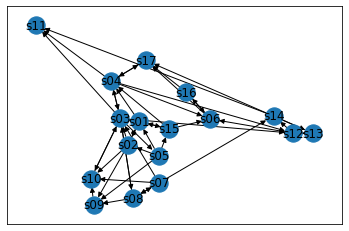

In [ ]:
nx.draw_networkx(G_directed)

In [ ]:
max_incoming_edges = len(G_directed.nodes) - 1
max_incoming_edges

16

In [ ]:
#Degree Prestige
for node in G_directed.nodes():
  print(node, G_directed.in_degree(node)/max_incoming_edges)

s01 0.25
s02 0.125
s03 0.375
s04 0.25
s15 0.125
s09 0.1875
s10 0.25
s05 0.0625
s08 0.125
s11 0.1875
s12 0.1875
s06 0.25
s17 0.25
s16 0.0625
s07 0.0625
s14 0.125
s13 0.125


## Exercise 1: Calculate Proximity Prestige for graph G_directed.
[Help](https://youtu.be/CZp6Bxifvc8)